## Milestone_2 Vehicle Loan Default Machine Learning

### Name : Alexander Greateine Tanaku
### Class: FTDS - 014

## Introduction

Machine learning are applicable throughout many industries and machine learning can really help our work making everyday task easier. Financial industries and services oftenly use classification machine learning model to help detect fraud or to give basic assesment of credit card approval like this one. Credit card approval is a crucial thing because if a person default to pay, it will incur losses to the company and bad for our cashflow. That's why making a good machine learning model to help solve this problem is a big help. We need to analyze whether a person will be approved or not in the future with good efficiency and accuracy with machine learning model and that is my goal here.

## Objectives
1. Do a data analysis from the dataset about financial data
2. Make a machine learning model to predict loan default.

## Import Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.special import logsumexp
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix,roc_auc_score
from sklearn.linear_model  import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import pickle

## Loading Dataset

In [2]:
df = pd.read_csv('train.csv')
df

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-1988,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-1988,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-1976,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-1994,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


This dataset is about vehicle loan default or not default in India, there are 233154 number of observation in this data and 41 columns containing information from various customer. 

## Description of the dataset 

In [3]:
pd.set_option('display.max_colwidth', None)
pd.read_excel('Data Dictionary.xlsx')

,Variable Name,Description
0,UniqueID,Identifier for customers
1,loan_default,Payment default in the first EMI on due date
2,disbursed_amount,Amount of Loan disbursed
3,asset_cost,Cost of the Asset
4,ltv,Loan to Value of the asset
5,branch_id,Branch where the loan was disbursed
6,supplier_id,Vehicle Dealer where the loan was disbursed
7,manufacturer_id,"Vehicle manufacturer(Hero, Honda, TVS etc.)"
8,Current_pincode,Current pincode of the customer
9,Date.of.Birth,Date of birth of the customer


# Data Cleaning for EDA

In [4]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      225493 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  object 
 11  STATE_ID     

As we can see the the dataset column info, there are some data with wrong data types, average account age are not an integer and credit history length, date of birth and the date of disbursal are not in a datetime format, hence there needs to be some data cleaning to be done

In [5]:
# Changing AVERAGE_ACCT_AGE & CREDIT_HISTORY_LENGTH
# Splitting the 1yrs into only the number 1 and also splitting month
df[['AVERAGE_ACCT_Yr','AVERAGE_ACCT_Month']] = df['AVERAGE_ACCT_AGE'].str.split("yrs",expand=True) 
# Splitting the 1mon into only number 1 and month1 is needed for the split
df[['AVERAGE_ACCT_Month','AVERAGE_ACCT_Month1']] = df['AVERAGE_ACCT_Month'].str.split("mon",expand=True) 
# Calculating the average account age by adding year plus month divided by 12 month
df["AVERAGE_ACCT_AGE"]= df["AVERAGE_ACCT_Yr"].astype(str).astype(int)+((df["AVERAGE_ACCT_Month"].astype(str).astype(int))/12)
df= df.drop(columns= ["AVERAGE_ACCT_Yr","AVERAGE_ACCT_Month",'AVERAGE_ACCT_Month1'])


In [6]:
# Same theory with above
df[['CREDIT_HISTORY_LENGTH_Yr','CREDIT_HISTORY_LENGTH_Month']] = df['CREDIT_HISTORY_LENGTH'].str.split("yrs",expand=True)
df[['CREDIT_HISTORY_LENGTH_Month','CREDIT_HISTORY_LENGTH_Month1']] = df['CREDIT_HISTORY_LENGTH_Month'].str.split("mon",expand=True)
df["CREDIT_HISTORY_LENGTH"]= df["CREDIT_HISTORY_LENGTH_Yr"].astype(str).astype(int)+((df["CREDIT_HISTORY_LENGTH_Month"].astype(str).astype(int))/12)
df= df.drop(columns= ["CREDIT_HISTORY_LENGTH_Yr","CREDIT_HISTORY_LENGTH_Month",'CREDIT_HISTORY_LENGTH_Month1'])

In [7]:
# Change the Date of Birth into Datetime format
df['DATE_OF_BIRTH'] =  pd.to_datetime(df['DATE_OF_BIRTH'], format='%d-%m-%Y')
#format='%d%b%Y:%H:%M:%S.%f'
df['DISBURSAL_DATE'] =  pd.to_datetime(df['DISBURSAL_DATE'], format='%d-%m-%Y')

In [8]:
## Adding the age of customers
now = pd.Timestamp('now')
df['age'] = (now - df['DATE_OF_BIRTH']).astype('<m8[Y]')

# Exploratory Data Analysis (EDA)

In [9]:
# Function for distribution
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))

    # histogram
    sns.histplot(df[col],ax = axes[0], kde=True,line_kws={'linewidth': 3},color = 'k', bins = 10)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()

    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")

    plt.show()

    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))
    print('-----' * 10)
    print(f'Average of {col} is', df[col].mean())
    print(f'Median of {col} is', df[col].median())

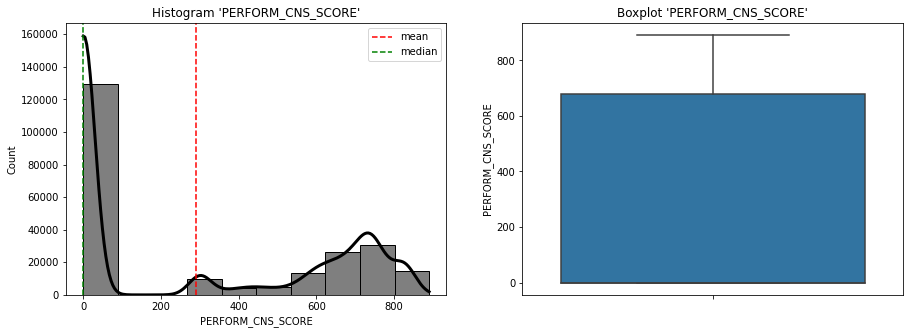

PERFORM_CNS_SCORE Kurtosis: -1.6352575159541496
PERFORM_CNS_SCORE Skewness: 0.44515046415251963
Columns 'PERFORM_CNS_SCORE' normal distribution
--------------------------------------------------
Average of PERFORM_CNS_SCORE is 289.46299441570807
Median of PERFORM_CNS_SCORE is 0.0


In [10]:
## See the distribution of Credit Score
plot_dist(df,'PERFORM_CNS_SCORE')

## Insight
Credit bureau score is a credit rating system in India that range between 300 - 900, there are some problem in our dataset because we are looking at most of our customers have 0 credit rating score, this is very dangerous as lower credit rating means more risk of a person defaulting. However, there are some good things looking at this graph because there are still people that have been credit rated by the bureau and for the people that have been given credit rating, the highest credit rating is around 600 - 900 and that is the ideal amount. 

In [11]:
# Grouping by loan default or not default
df_loan = df.groupby(by = 'LOAN_DEFAULT').agg({'DISBURSED_AMOUNT': 'mean',
                                     'PERFORM_CNS_SCORE': 'mean',
                                     'AVERAGE_ACCT_AGE': 'mean',
                                     'ASSET_COST': 'mean',
                                     'LTV': 'mean'})
df_loan

,DISBURSED_AMOUNT,PERFORM_CNS_SCORE,AVERAGE_ACCT_AGE,ASSET_COST,LTV
LOAN_DEFAULT,,,,,
0,53826.471111,299.784270,0.759406,75722.806128,74.154093
1,56270.473869,252.236372,0.683735,76378.176661,76.883322


## Insight
1. LTV is mortgage divided by appraised property value, here we can see that a person who default in loan payment have more LTV, LTV means loan to value and it is associated with risk, the higher the LTV the higher the risk because the mortgage is also higher.
2. People who are default their credit payment have higher disbursed amount on average meaning that they borrow more money than people who did not default their payment

4. Most of our customer are a customer for less than a year from their average account age

In [12]:
# Grouping by branch id and look which branch id's customer default the most
df.groupby(by = 'BRANCH_ID').agg({
    'LOAN_DEFAULT':'count',
    'DISBURSED_AMOUNT':'mean',
    'LTV':'mean'
}).sort_values(by = 'LOAN_DEFAULT', ascending = False).head(20)

,LOAN_DEFAULT,DISBURSED_AMOUNT,LTV
BRANCH_ID,,,
2,13138,61157.975567,79.529167
67,11328,51916.069297,77.120983
3,9230,48415.255255,76.108408
5,9218,55260.654806,78.432289
36,8832,56027.814085,69.464094
136,7833,57202.792417,77.219847
34,7794,52015.585065,76.500947
16,6466,55692.413702,76.880215
19,5860,55200.247611,79.686259


## Insight
There needs to be a special attention to these branch id because they most loan default are from these places, there needs to be a special care also for branch id that is giving credit with high ltv because it is more risky 

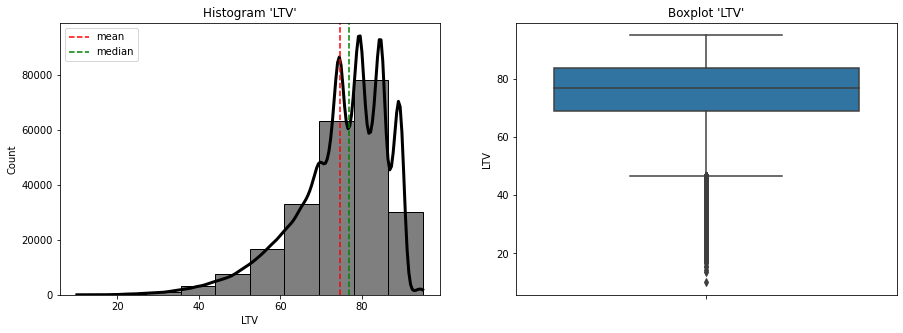

LTV Kurtosis: 1.293927649863921
LTV Skewness: -1.0757660644024252
Columns 'LTV' left skewed
--------------------------------------------------
Average of LTV is 74.74653001878589
Median of LTV is 76.8


In [13]:
# Looking at the distribution of LTV
plot_dist(df,'LTV')

## Insight
1. Since we are a vehicle credit company, it is expected to have a high LTV since this is a risky business, however there are some LTV that is lower than 50%, it means that the customer only borrow less than 50% of the asset appraised cost meaning less profit, let's collaborate this matter with sales team about this.
2. the average of credit LTV is almost 75% and it is considered normal, anything more than 80% we need the customer to also pay insurance because it has become too risky and the chance of customer default payment is high.

In [14]:
df_loan2 = df.groupby(by = 'LOAN_DEFAULT').agg({'DISBURSED_AMOUNT': 'mean',
                                     'ASSET_COST': 'mean'})

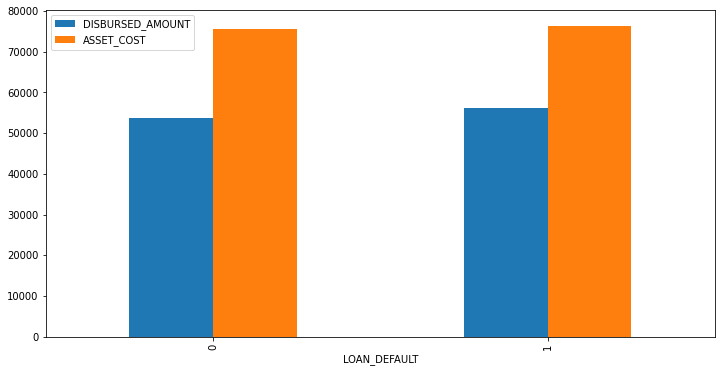

In [15]:
fig,ax = plt.subplots(figsize=(12,6))
df_loan2.plot(kind = 'bar', ax = ax)
plt.legend(loc='upper left')

## Insight

This is the proof that the current credit screening for approval is bad, there are no significant difference between the asset cost of people that fails to pay and people that pay, this means that they get the same disbursement money and that is just wrong. The rules of our credit system must be more tight, persons who are making riskier credit should have a certain threshold on how many he could borrow and how ready is he, we should give more disbursed amount for people who can really pay, not for people who are more risky. the asset score is almost the same for loan default 0 and 1 but the disbursement money is higher on the loan default side

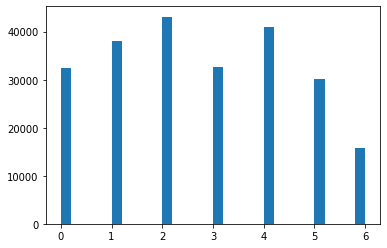

In [16]:
# Making visualization of disbursal date
plt.hist(df['DISBURSAL_DATE'].dt.dayofweek, bins=30)
plt.show()

This visualization shows that the date of the disbursal, the transaction is at peak on Wednesday and Friday, note that employee must be extra careful at those days of the week because it's our "peakdays" according to this dataset. 

In [17]:
## Binning according to LTV
bin_labels = ['Low', 'Medium', 'High', 'Extreme']
df['LTV_bins'] = pd.qcut(df['LTV'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels)

In [18]:
# Make a crosstab between two categorical variable
CrosstabResult=pd.crosstab(index=df['LOAN_DEFAULT'],columns=df['LTV_bins'])
print(CrosstabResult)

LTV_bins        Low  Medium   High  Extreme
LOAN_DEFAULT                               
0             49209   46109  44495    42730
1              9094   12190  13790    15537


<AxesSubplot:xlabel='LOAN_DEFAULT'>

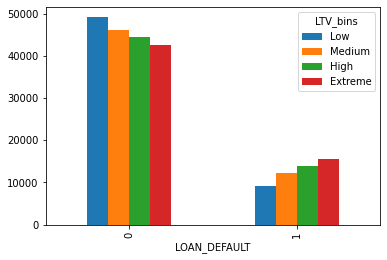

In [19]:
# Make a plot 
CrosstabResult.plot.bar()

## Insight
There are very unique pattern arising here, see that in category 0 or no loan default, the percentage of people with low LTV is higher than people with extreme LTV. In a case where loan default is happening, the biggest bar there is the extreme LTV bins, this means that our credit card service has been approving credit for people that borrow money to buy asset that has a very large LTV, no wonders people who default have higher average disbursal amount

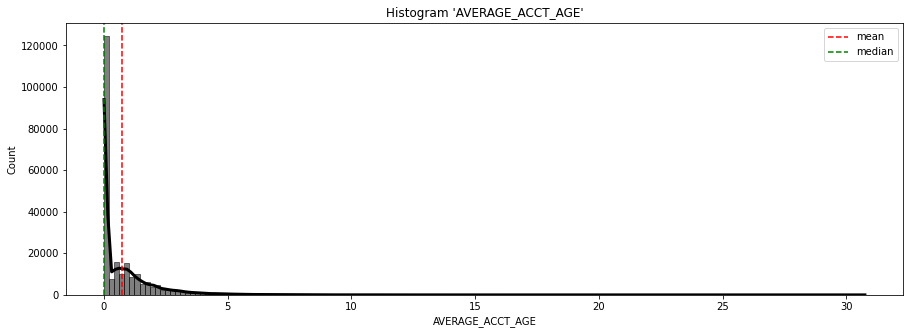

In [20]:
fig, ax = plt.subplots(figsize = (15, 5))

# histogram
sns.histplot(df['AVERAGE_ACCT_AGE'],ax = ax, kde=True,line_kws={'linewidth': 3},color = 'k', bins = 150)
ax.set_title(f"Histogram '{'AVERAGE_ACCT_AGE'}'")
ax.axvline(df['AVERAGE_ACCT_AGE'].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
ax.axvline(df['AVERAGE_ACCT_AGE'].median(), color = 'green', linestyle = 'dashed', label = 'median')
ax.legend()

## Insight
Although there are people who have the average account age of 30 years old the median of average account age is at zero, meaning that this data also contains people that barely become a member here. There need to be a push in education and marketing about those people who are new to our service so they can understand better and use more of our financial product, however keep in mind that only choose less risky people for vehicle credit approval

In [21]:
pd.set_option('display.max_columns', None)
df.groupby(by = 'EMPLOYMENT_TYPE').agg({
    'DISBURSED_AMOUNT':'mean',
    'LTV':'mean',
    'PERFORM_CNS_SCORE':'mean',
    'PRI_CURRENT_BALANCE':'mean',
    'PRI_SANCTIONED_AMOUNT':'mean',
    'PRIMARY_INSTAL_AMT':'mean',
    'SEC_INSTAL_AMT':'mean',
    'AVERAGE_ACCT_AGE':'mean',
    'LOAN_DEFAULT':'count'
})

,DISBURSED_AMOUNT,LTV,PERFORM_CNS_SCORE,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,AVERAGE_ACCT_AGE,LOAN_DEFAULT
EMPLOYMENT_TYPE,,,,,,,,,
Salaried,54534.755493,76.210719,310.417830,146039.042419,188316.233236,10704.37488,422.615187,0.752693,97858
Self employed,54015.298022,73.730119,279.717178,185687.850832,247955.507713,14746.73385,251.367517,0.752102,127635


## Insight
1. Salaried Employment type have averagely higher LTV meaning the amount that they borrow to the value of product is higher than those of the self employed
2. It can be seen that salaried person have a higher credit score, maybe this is due to their stable income rather than unstable income of those who are self employed.
3. Self employed have higher current balance than salaried person but both of self employed person and salaried person sanctioned amount is larget than their current balance
4. self employed person have higher primary installation amount meaning that they use our installment services more often
5. Both employed and self employed are new to our service with the average account age of under a year and self employed people have more loan default cases than salaried person

# Machine Learning Work Area

## Data Preparation  - Feature Selection

In [22]:
## Dropping Useless Feature 

data_train_test = df.drop([
    'SUPPLIER_ID', 
    'DATE_OF_BIRTH' , 
    'STATE_ID', 
    'CURRENT_PINCODE_ID',
    'EMPLOYEE_CODE_ID', 
    'MANUFACTURER_ID', 
    'BRANCH_ID',
    'MOBILENO_AVL_FLAG',
    'AADHAR_FLAG',
    'PAN_FLAG',
    'VOTERID_FLAG',
    'DRIVING_FLAG',
    'PERFORM_CNS_SCORE_DESCRIPTION',
    'UNIQUEID',
    'PASSPORT_FLAG',
    'DISBURSAL_DATE',
    'LTV_bins'
],axis=1)

In [23]:
data_train_test.shape

(233154, 26)

The reason I said that the feature above is useless is because those features have no direct correlation with our customer. we have age data for the date of birth, where they live doesn't matter, their flag also doesn't matter and the uniqueid is not a good feature because the uniqueid is randomly generated. Perform cns score description was also not needed because we have the score so why put more ?

In [24]:
corr = data_train_test.corr()
corr[['LOAN_DEFAULT','LTV']].sort_values(by = 'LOAN_DEFAULT', ascending = False)

,LOAN_DEFAULT,LTV
LOAN_DEFAULT,1.000000,0.098208
LTV,0.098208,1.000000
DISBURSED_AMOUNT,0.077675,0.376747
NO_OF_INQUIRIES,0.043678,0.085725
PRI_OVERDUE_ACCTS,0.040872,0.051770
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,0.034462,0.041921
ASSET_COST,0.014261,-0.301188
SEC_OVERDUE_ACCTS,-0.001371,0.010256
SEC_INSTAL_AMT,-0.001548,0.000481
SEC_CURRENT_BALANCE,-0.005531,0.007195


There are no high number of correlation from this data, maybe if later I combine the feature to some component with PCA dimensionality reduction, we can get better result, but this is our data for training

## Make Inference Model

In [25]:
## Make Inference Data

data_inf = df.sample(100, random_state = 100)
## Remove Inference Data from Dataset
data_train_test = data_train_test.drop(data_inf.index)

data_train_test.reset_index(inplace = True, drop = True)
data_inf.reset_index(drop = True, inplace = True)

## Data Preparation - Splitting x(features) and y(target)

In [26]:
## Splitting data into train and test
X = data_train_test.drop('LOAN_DEFAULT', axis = 1)
y = data_train_test['LOAN_DEFAULT']
X.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,EMPLOYMENT_TYPE,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,age
0,50578,58400,89.55,Salaried,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,38.0
1,47145,65550,73.23,Self employed,598,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1.916667,1.916667,0,37.0
2,53278,61360,89.63,Self employed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,37.0
3,57513,66113,88.48,Self employed,305,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0.666667,1.250000,1,28.0
4,52378,60300,88.39,Self employed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,1,44.0


## Data Preparation - Splitting Train and Test

In [27]:
# Split between Train-set and Test-set

X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.20, random_state = 30)

print('Train Size:', X_train.shape)
print('Test Size:', X_test.shape)

Train Size: (186443, 25)
Test Size: (46611, 25)


## Data Pre-processing - Missing Value Handling

In [28]:
# Check for Missing Values for Train feature
X_train.isnull().sum()

DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
EMPLOYMENT_TYPE                        6165
PERFORM_CNS_SCORE                         0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                          0
PRI_OVERDUE_ACCTS                         0
PRI_CURRENT_BALANCE                       0
PRI_SANCTIONED_AMOUNT                     0
PRI_DISBURSED_AMOUNT                      0
SEC_NO_OF_ACCTS                           0
SEC_ACTIVE_ACCTS                          0
SEC_OVERDUE_ACCTS                         0
SEC_CURRENT_BALANCE                       0
SEC_SANCTIONED_AMOUNT                     0
SEC_DISBURSED_AMOUNT                      0
PRIMARY_INSTAL_AMT                        0
SEC_INSTAL_AMT                            0
NEW_ACCTS_IN_LAST_SIX_MONTHS              0
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS       0
AVERAGE_ACCT_AGE                          0
CREDIT_HISTORY_LENGTH           

In [29]:
# Check for Missing values for test feature
X_test.isnull().sum()

DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
EMPLOYMENT_TYPE                        1493
PERFORM_CNS_SCORE                         0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                          0
PRI_OVERDUE_ACCTS                         0
PRI_CURRENT_BALANCE                       0
PRI_SANCTIONED_AMOUNT                     0
PRI_DISBURSED_AMOUNT                      0
SEC_NO_OF_ACCTS                           0
SEC_ACTIVE_ACCTS                          0
SEC_OVERDUE_ACCTS                         0
SEC_CURRENT_BALANCE                       0
SEC_SANCTIONED_AMOUNT                     0
SEC_DISBURSED_AMOUNT                      0
PRIMARY_INSTAL_AMT                        0
SEC_INSTAL_AMT                            0
NEW_ACCTS_IN_LAST_SIX_MONTHS              0
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS       0
AVERAGE_ACCT_AGE                          0
CREDIT_HISTORY_LENGTH           

In [30]:
# Check for Missing values for train target
y_train.isnull().sum()

0

In [31]:
y_test.isnull().sum()

0

In [32]:
# Checking the shape
X_train.shape

(186443, 25)

Since I have around 186,443 data and only less than 5% data is missing, I decide to drop the missing values

In [33]:
# Locate the index of missing values
a = X_train[X_train['EMPLOYMENT_TYPE'].isnull()].index.tolist()
b = X_test[X_test['EMPLOYMENT_TYPE'].isnull()].index.tolist()

In [34]:
# Drop the missing Values in train and test
X_train.drop(a, inplace = True)
X_test.drop(b, inplace = True)
y_train.drop(a, inplace = True)
y_test.drop(b, inplace = True)

## Data Pre-processing - Outlier Handling

Outlier can only be handled if the data is a numeric column, now let's split the data into numeric and categoric

In [35]:
# Numerical column and Categorical Column Split
num_columns = X_train.select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist()

In [36]:
# Make numerical and categorical df to do scaling and encoding
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

In [37]:
X_train_num

,DISBURSED_AMOUNT,ASSET_COST,LTV,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,age
222651,38639,65179,60.91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,28.0
51574,53078,68766,79.98,738,3,3,0,37383,47250,47250,0,0,0,0,0,0,3570,0,3,0,0.333333,0.416667,1,37.0
138224,47849,69569,70.43,488,9,4,3,520468,566500,566500,0,0,0,0,0,0,30904,0,0,3,2.583333,10.916667,0,41.0
221507,51303,71497,72.73,628,5,0,0,0,0,0,0,0,0,0,0,0,3760,0,0,0,1.000000,1.750000,0,28.0
60540,53478,72468,75.90,845,2,0,0,0,0,0,0,0,0,0,0,0,11864,0,0,0,2.416667,3.916667,0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46220,37304,76304,51.11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,37.0
98804,54013,71629,78.18,16,2,1,0,97533,160000,160000,0,0,0,0,0,0,4444,0,0,1,2.166667,2.916667,0,32.0
48045,44909,64116,74.86,708,4,2,0,15165,48500,48500,0,0,0,0,0,0,0,0,1,0,0.750000,1.166667,0,48.0
201125,37939,72292,54.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,26.0


<AxesSubplot:>

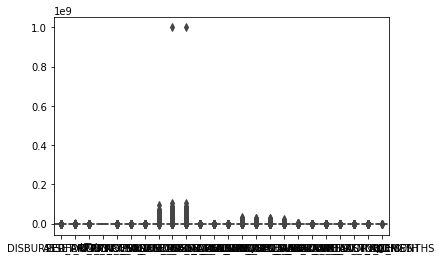

In [38]:
sns.boxplot(data = X_train_num)

From the Graph above, it can be said that almost all of the data have outliers, outliers are a problem to machine learning analysis because it could lead to a highly biased answer and lead to misclassification, the approach that I decide to deal with this kind of outlier is to winsorize all of the column

In [39]:
# Define the winsorizer
winsor = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=num_columns)

winsor.fit(X_train_num)

X_train_num = winsor.transform(X_train_num)

After the outlier being handled, we can see that some current balance are below zero, This is actually pretty normal since minus current balance means that we owed our customer money

## Feature Engineering - Scaling

In [40]:
# Using StandardScaler to scale the data
scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [41]:
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = num_columns)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns = num_columns)

I use standard scaler because it removes the mean and scales each feature/variable to unit variance.

<AxesSubplot:>

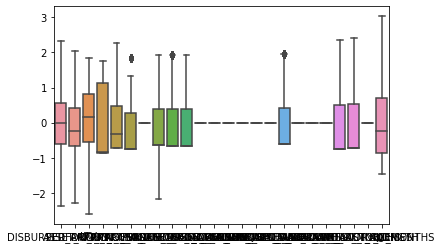

In [42]:
# Data after Winsorized and scaled
sns.boxplot(data = X_train_num_scaled)

## Feature Engineering - Encoding

In [43]:
enc_dict = {'Self employed':0,
            'Salaried':1}

X_train_cat_encoded =  X_train_cat['EMPLOYMENT_TYPE'].map(enc_dict)
X_test_cat_encoded = X_test_cat['EMPLOYMENT_TYPE'].map(enc_dict)

In [44]:
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded, columns = cat_columns).reset_index(drop = True)
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded, columns = cat_columns).reset_index(drop = True)

In [45]:
X_train_cat_encoded

,EMPLOYMENT_TYPE
0,1
1,0
2,1
3,1
4,0
...,...
180273,0
180274,0
180275,0
180276,0


### Combining all the feature

In [46]:
X_train_final = pd.concat([X_train_cat_encoded,X_train_num_scaled], axis=1)
X_test_final = pd.concat([X_test_cat_encoded,X_test_num_scaled], axis=1)

In [47]:
X_train_final

,EMPLOYMENT_TYPE,DISBURSED_AMOUNT,ASSET_COST,LTV,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,age
0,1,-1.365510,-0.691466,-1.298043,-0.865595,-0.716965,-0.755232,0.0,-0.626902,-0.655631,-0.654882,0.0,0.0,0.0,0.0,0.0,0.0,-0.612664,0.0,0.0,0.0,-0.738320,-0.710817,0.0,-1.059167
1,0,-0.072621,-0.400582,0.457682,1.310897,0.476134,1.854317,0.0,0.425976,0.102851,0.124517,0.0,0.0,0.0,0.0,0.0,0.0,1.187389,0.0,0.0,0.0,-0.356141,-0.451547,0.0,-0.128204
2,1,-0.540833,-0.335464,-0.421561,0.573603,2.265783,1.854317,0.0,1.925483,1.932841,1.928854,0.0,0.0,0.0,0.0,0.0,0.0,1.953798,0.0,0.0,0.0,2.223565,2.400430,0.0,0.285558
3,1,-0.231557,-0.179115,-0.209806,0.986488,1.271534,-0.755232,0.0,-0.626902,-0.655631,-0.654882,0.0,0.0,0.0,0.0,0.0,0.0,1.283190,0.0,0.0,0.0,0.408216,0.378119,0.0,-1.059167
4,0,-0.036804,-0.100373,0.082047,1.626459,0.078435,-0.755232,0.0,-0.626902,-0.655631,-0.654882,0.0,0.0,0.0,0.0,0.0,0.0,1.953798,0.0,0.0,0.0,2.032476,1.726327,0.0,1.423401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180273,0,-1.485047,0.210702,-2.200303,-0.865595,-0.716965,-0.755232,0.0,-0.626902,-0.655631,-0.654882,0.0,0.0,0.0,0.0,0.0,0.0,-0.612664,0.0,0.0,0.0,-0.738320,-0.710817,0.0,-0.128204
180274,0,0.011100,-0.168411,0.291961,-0.818408,0.078435,0.288588,0.0,1.925483,1.912775,1.928854,0.0,0.0,0.0,0.0,0.0,0.0,1.628074,0.0,0.0,0.0,1.745842,1.104077,0.0,-0.645405
180275,0,-0.804085,-0.777668,-0.013703,1.222422,0.873834,1.332408,0.0,-0.199786,0.122917,0.145136,0.0,0.0,0.0,0.0,0.0,0.0,-0.612664,0.0,0.0,0.0,0.121582,0.015140,0.0,1.009640
180276,0,-1.428189,-0.114646,-1.875305,-0.865595,-0.716965,-0.755232,0.0,-0.626902,-0.655631,-0.654882,0.0,0.0,0.0,0.0,0.0,0.0,-0.612664,0.0,0.0,0.0,-0.738320,-0.710817,0.0,-1.266047


## Oversampling

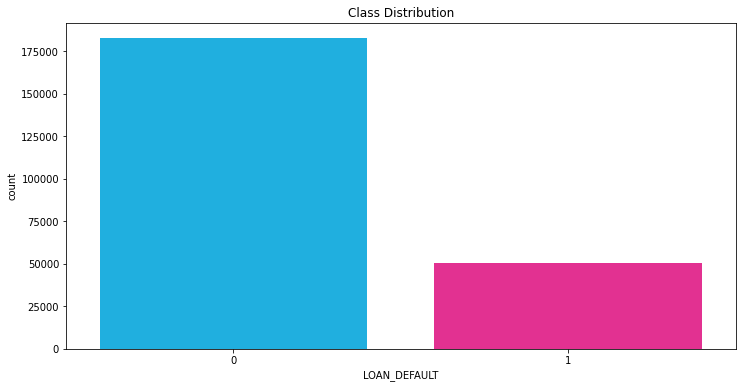

% of no defaults      : 78.29288796246257
Number of no defaults : 182543
% of defaults         : 21.70711203753742
Number of defaults    : 50611


In [48]:
#Graph
my_pal = {0: 'deepskyblue', 1: 'deeppink'}

plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'LOAN_DEFAULT', data = df, palette = my_pal)
plt.title('Class Distribution')
plt.show()

# Count and %
Count_Normal_transacation = len(df[df['LOAN_DEFAULT']==0])
Count_Fraud_transacation = len(df[df['LOAN_DEFAULT']==1]) 
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of no defaults      :', Percentage_of_Normal_transacation*100)
print('Number of no defaults :', Count_Normal_transacation)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of defaults         :',Percentage_of_Fraud_transacation*100)
print('Number of defaults    :', Count_Fraud_transacation)

There are data imbalance for the target data, this could be a problem because the machine will learn class 0 better than class 1, 1 in here meaning fraud transactions or loan default. To minimize this problem, I decide to do oversampling so the machine learning work better in detecting class 1.

In [49]:
## Oversampling using SMOTE
sm = SMOTE(random_state=27)
X_train_balance, y_train_balance = sm.fit_resample(X_train_final, y_train)

In [50]:
# Now the target is balanced
y_train_balance.value_counts()

0    140909
1    140909
Name: LOAN_DEFAULT, dtype: int64

## PCA

In [51]:
# Comparing the VIF of each features
vif_data = pd.DataFrame()
vif_data["features"] = X_train_final.columns

## Calculate the VIF of each features
VIF = []

for i in range(len(X_train_final.columns)):
    res = logsumexp(variance_inflation_factor(X_train_balance.values, i))
    VIF.append(res)

vif_data['VIF'] = VIF
vif_data.sort_values(by = 'VIF', ascending = False)

c:\Users\alexa\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,features,VIF
10,PRI_DISBURSED_AMOUNT,117.609728
9,PRI_SANCTIONED_AMOUNT,106.650971
1,DISBURSED_AMOUNT,13.982671
2,ASSET_COST,13.122688
22,CREDIT_HISTORY_LENGTH,12.003880
8,PRI_CURRENT_BALANCE,10.012284
21,AVERAGE_ACCT_AGE,9.920048
3,LTV,7.612876
6,PRI_ACTIVE_ACCTS,5.798921
5,PRI_NO_OF_ACCTS,5.398227


Besides from Nan values, there VIF of some features are really high meaning that I can make the dimension smaller using PCA for faster computing time and same interpretability

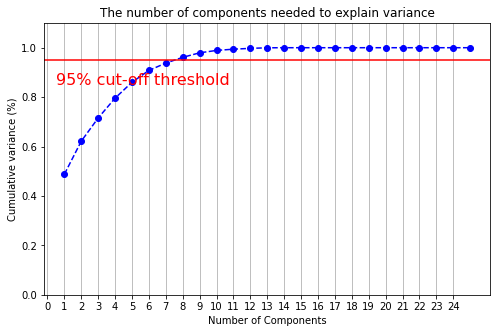

In [54]:
# Fitting the PCA to the scaled features
pca = PCA().fit(X_train_balance)

# Make plot according to the fit above
fig, ax = plt.subplots(figsize=(8,5))
xi = np.arange(1, 26, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 25, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

From this graph, it can be seen that only with 8 components, the data can still explain 95% of the variance, hence I will reduce the data until 8 components 

In [55]:
pca_model = PCA(n_components = 8) # Define the PCA
pca_model.fit(X_train_balance) # Fit into our features
X_train_pca = pca_model.transform(X_train_balance)
X_test_pca = pca_model.transform(X_test_final)

In [56]:
X_train_pca = pd.DataFrame(X_train_pca,columns = [np.arange(1,9).astype(str)])
pca_model.explained_variance_ratio_.sum()

0.9610876610936148

This is the new train features, and now I am ready to do make the best machine learning model, the new features after we do pca have 8 dimensions yet it bring 96% of the data.

## Machine Learning Model - Cross Value Score

In [55]:
# Make a Loop to try and see all model cross value score and choosing the best model from it
for model in ([
    LogisticRegression(), 
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
]):
    score = cross_val_score(model, X_train_pca, y_train_balance, cv=5, scoring = 'accuracy').mean()
    std_dev = cross_val_score(model, X_train_final, y_train, cv=5, scoring = 'accuracy').std()
    print(f' model {model} has the cross_val score mean of', score)
    print(f' model {model} has the cross_val score standard deviation of', std_dev)
    print('-'*15)

 model LogisticRegression() has the cross_val score mean of 0.5730719889785263
 model LogisticRegression() has the cross_val score standard deviation of 7.850200009620274e-05
---------------
 model DecisionTreeClassifier() has the cross_val score mean of 0.6885046936888876
 model DecisionTreeClassifier() has the cross_val score standard deviation of 0.002476450772207261
---------------
 model RandomForestClassifier() has the cross_val score mean of 0.7812028433505783
 model RandomForestClassifier() has the cross_val score standard deviation of 0.00095319824511202
---------------
 model AdaBoostClassifier() has the cross_val score mean of 0.5823403933372454
 model AdaBoostClassifier() has the cross_val score standard deviation of 7.367816139256744e-05
---------------


After looking for the crossvalue score mean, it turns out that Random forest classifier and decision tree classifier has the best crossvalue score in terms of accuracy. Now let's try to tune all of the model and try again because classifier like decision tree and random forest tend to overfit and have good training data and bad test result.

# Machine Learning Model - Logistic Regression

In [ ]:
# Ignore warnings for gridsearch 
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Logistic Regression - Hyperparameter Tuning

In [77]:
## Hyper Parameter Tuning Logistic Regression

log_reg = LogisticRegression() 
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : (0.001, 0.01, 0.1, 1, 10 , 100, 1000),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga','none'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
grid_one = GridSearchCV(log_reg, param_grid = param_grid,cv = 5, verbose=True, n_jobs=-1)

In [79]:
# Fitting the classifier to train data and find the best parameter for this data
log_clf = grid_one.fit(X_train_pca,y_train_balance)
log_clf.best_estimator_

Fitting 5 folds for each of 672 candidates, totalling 3360 fits


LogisticRegression(C=0.001, solver='liblinear')

## Logistic Regression - Prediction

In [98]:
log_reg = LogisticRegression(C=0.001, solver='liblinear')
log_reg.fit (X_train_pca, y_train_balance)

y_pred_test_log = log_reg.predict(X_test_pca)
y_pred_train_log =  log_reg.predict(X_train_pca)

print('accuracy score train : ',accuracy_score(y_train_balance,y_pred_train_log))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_log))

accuracy score train :  0.5733239182734957
accuracy score test :  0.5179750875482069


## Logistic Regression - Evaluation

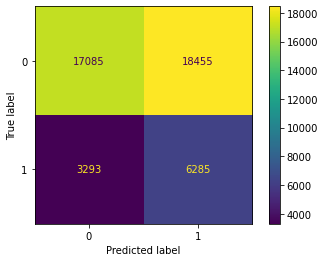

In [86]:
cm = confusion_matrix(y_test, y_pred_test_log, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_)

disp.plot()
plt.show()

In [88]:
print(classification_report(y_test, y_pred_test_log))

              precision    recall  f1-score   support

           0       0.84      0.48      0.61     35540
           1       0.25      0.66      0.37      9578

    accuracy                           0.52     45118
   macro avg       0.55      0.57      0.49     45118
weighted avg       0.71      0.52      0.56     45118



No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.586


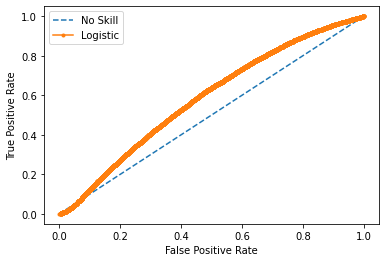

In [105]:
ns_probs = [0 for _ in range(len(y_test))]


lr_probs = log_reg.predict_proba(X_test_pca)
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

The ROC AUC Score for logistic regression is 0.586 it means that the prediction is 58.6% correct. precision of class 1 is so bad, meaning that the people is not loan default but predicted is loan default it mispredict a lot of it and as the result 18455 person who sould be the customer is gone. there are 3293 people who loan default but predicted as not loan default. although class 0 have high precision of 0.84 the recall is bad, it means it fails to recognize class 0 a lot of time, however in class 1 the precision is worst but the recall is better. This machine learning model is 'too afraid' to let people be in the class 0 of not loan defaulters. This result is not satisfying and kinda bad because there is only 6% increase in accuracy of using this model rather than blindly choose. 

# Machine Learning Model - Decision Tree

## Decision Tree - Hyperparameter Tuning

In [92]:
# Define Model
treeclf = DecisionTreeClassifier()

#Define Hyperparameter
param_grid_tree = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [20, 50, 100, 500, 1000],
    'criterion': ["gini", "entropy"]
}

# define grid_search
grid_search_tree = GridSearchCV(estimator = treeclf, param_grid = param_grid_tree, cv = 5, verbose = True, n_jobs=-1)
# Grid_search according to our data
grid_search_tree.fit(X_train_pca, y_train_balance)

#Decision Tree Best Estimator
grid_search_tree.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


DecisionTreeClassifier(max_depth=20, min_samples_leaf=20)

## Decision Tree - Model Prediction

In [97]:
# Define Tuned Model
treeclf = DecisionTreeClassifier(max_depth=20, min_samples_leaf=20)
treeclf.fit(X_train_pca, y_train_balance)

#predict
y_pred_test_tree = treeclf.predict(X_test_pca)
y_pred_train_tree = treeclf.predict(X_train_pca)

# Accuracy score of train and test
print('accuracy score train : ',accuracy_score(y_train_balance,y_pred_train_tree))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_tree))

accuracy score train :  0.6922978659986232
accuracy score test :  0.5595771089144023


## Decision Tree - Model Evaluation

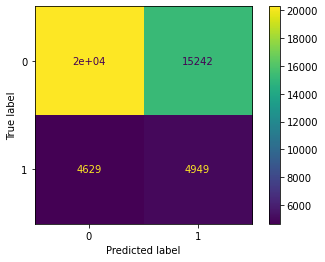

In [99]:
cm = confusion_matrix(y_test, y_pred_test_tree, labels=treeclf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=treeclf.classes_)

disp.plot()
plt.show()

In [100]:
print(classification_report(y_test, y_pred_test_tree))

              precision    recall  f1-score   support

           0       0.81      0.57      0.67     35540
           1       0.25      0.52      0.33      9578

    accuracy                           0.56     45118
   macro avg       0.53      0.54      0.50     45118
weighted avg       0.69      0.56      0.60     45118



No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.553


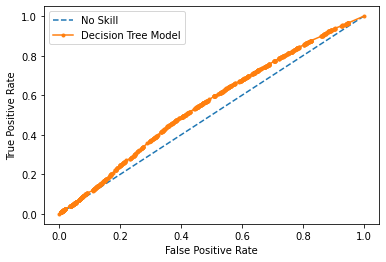

In [119]:
ns_probs = [0 for _ in range(len(y_test))]


lr_probs = treeclf.predict_proba(X_test_pca)
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree Model')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

The result is similar to logistic regression, I cannot say that this one is better because although the accuracy on decision tree is better by 4%, the roc auc is worst than logistic regression. this model is also not a good fit because the roc is not higher than 0.7 (*rule by me), and overfitting problem. This model predict 4629 people as clean although they loan default, that is higher than logistic regression model, if on logistic regression model the company must pay big opportunity cost, here the loan defaulters will incur a large loss on the company

# Machine Learning Model - Random Forest

## Random Forest - Hyperparameter Tuning

In [107]:
forestclf = RandomForestClassifier()

param_grid = {
    'bootstrap': [True],
    'max_depth': [20, 40, 60, 80],
    'max_features': [2, 3],
    'min_samples_leaf': [10, 20, 50, 100, 200],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [108]:
# define grid_search
grid_search_forest = GridSearchCV(estimator = forestclf, param_grid = param_grid_tree, cv = 5, verbose = True, n_jobs=-1)
# Grid_search according to our data
grid_search_forest.fit(X_train_pca, y_train_balance)

#Decision Tree Best Estimator
grid_search_forest.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomForestClassifier(max_depth=20, min_samples_leaf=20)

## Random Forest - Model Prediction

In [112]:
# Define Tuned Model
forestclf = RandomForestClassifier(max_depth=20, min_samples_leaf=20)
forestclf.fit(X_train_pca, y_train_balance)

#predict
y_pred_test_forest = forestclf.predict(X_test_pca)
y_pred_train_forest = forestclf.predict(X_train_pca)

# Accuracy score of train and test
print('accuracy score train : ',accuracy_score(y_train_balance,y_pred_train_forest))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_forest))

accuracy score train :  0.7576059726490146
accuracy score test :  0.6287291103329048


The result is kinda overfit and similar to decision tree

## Random Forest - Model Evaluation

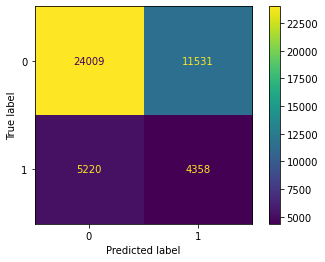

In [113]:
cm = confusion_matrix(y_test, y_pred_test_forest, labels=treeclf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=treeclf.classes_)

disp.plot()
plt.show()

In [114]:
print(classification_report(y_test, y_pred_test_forest))

              precision    recall  f1-score   support

           0       0.82      0.68      0.74     35540
           1       0.27      0.46      0.34      9578

    accuracy                           0.63     45118
   macro avg       0.55      0.57      0.54     45118
weighted avg       0.71      0.63      0.66     45118



No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.594


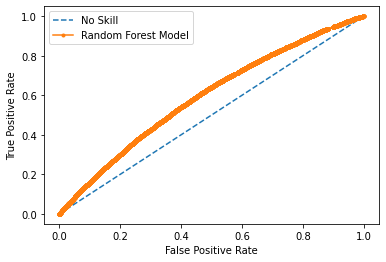

In [120]:
ns_probs = [0 for _ in range(len(y_test))]


lr_probs = forestclf.predict_proba(X_test_pca)
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest Model')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

So far, the model has the highest accuracy of 0.63, but it seems that this model also have a low roc auc score and low recall on class 1 which is the loan default transaction. the good site is, this model can predict class 0 pretty well than the other model, this model will not make the company pay a lot in opportunity cost because it is braver than the previous model of letting class 0 in but this model predict class 1 badly. Overall it is a decent model and so far this is the best one with the highest roc auc score

# Machine Learning Model - AdaBoost

## Ada Boost - Hyperparameter Tuning

In [56]:
adaclf = AdaBoostClassifier()
param_grid_ada = {
    'n_estimators': [10, 50],
    'learning_rate': [0.01, 0.1, 1.0],
}

In [57]:
grid_search_ada = GridSearchCV(estimator=adaclf, param_grid=param_grid_ada, n_jobs=-1, cv=5, scoring='accuracy')

grid_result = grid_search_ada.fit(X_train_pca, y_train_balance)

# Finding out which is the best estimator or hyperparameter to used
grid_result.best_estimator_

AdaBoostClassifier()

## Ada boost - Model Prediction

In [58]:
# Define Tuned Model
adaclf = AdaBoostClassifier()
adaclf.fit(X_train_pca, y_train_balance)

#predict
y_pred_test_ada = adaclf.predict(X_test_pca)
y_pred_train_ada = adaclf.predict(X_train_pca)

# Accuracy score of train and test
print('accuracy score train : ',accuracy_score(y_train_balance,y_pred_train_ada))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_ada))

accuracy score train :  0.5845474739015961
accuracy score test :  0.5910501352010284


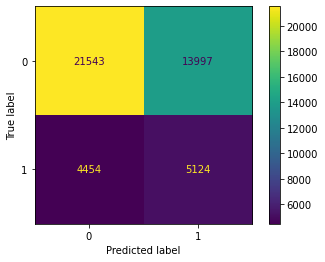

In [60]:
cm = confusion_matrix(y_test, y_pred_test_ada, labels=adaclf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=adaclf.classes_)

disp.plot()
plt.show()

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.588


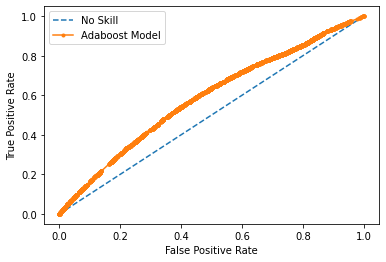

In [62]:
ns_probs = [0 for _ in range(len(y_test))]


lr_probs = adaclf.predict_proba(X_test_pca)
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Adaboost Model')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [63]:
print(classification_report(y_test, y_pred_test_ada))

              precision    recall  f1-score   support

           0       0.83      0.61      0.70     35540
           1       0.27      0.53      0.36      9578

    accuracy                           0.59     45118
   macro avg       0.55      0.57      0.53     45118
weighted avg       0.71      0.59      0.63     45118



Adaboost model is a model that combines several weak learner into a strong learner, putting more weight into misclassified data. Here we can see that the result is just mediocre compared to other model. at least this model has predicted class 1 better than random forest and the roc score is also similar. Compared to other model this model is very medium but atleast it has no overfitting problem. In fact, this model perform better on test.

## Pipeline of the Best Machine Learning Models

In [67]:
num_pipeline = make_pipeline(StandardScaler(),
                            SimpleImputer(strategy = 'most_frequent'),
                            PCA(n_components = 8))

cat_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'),
    OrdinalEncoder())

data_pipeline = ColumnTransformer([
    ('pipeline_num', num_pipeline, num_columns),
    (('pipeline_cat'), cat_pipeline, cat_columns)
])

# Final_pipeline

final_pipeline = make_pipeline(data_pipeline, RandomForestClassifier(max_depth=20, min_samples_leaf=20))

In [68]:
## data_inference X and Y

X_inference = data_inf.drop('LOAN_DEFAULT', axis = 1)
y_inference = data_inf['LOAN_DEFAULT']

In [69]:
## Final_pipeline training
final_pipeline.fit(X_train,y_train)

y_pred = final_pipeline.predict(X_inference)
print(classification_report(y_inference, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        80
           1       0.00      0.00      0.00        20

    accuracy                           0.80       100
   macro avg       0.40      0.50      0.44       100
weighted avg       0.64      0.80      0.71       100



c:\Users\alexa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alexa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alexa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

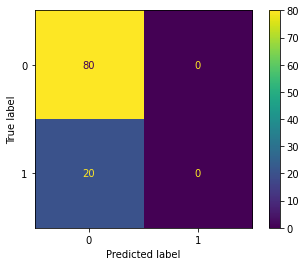

In [74]:
cm = confusion_matrix(y_inference, y_pred, labels=final_pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=final_pipeline.classes_)

disp.plot()
plt.show()

After inputting the data inference to the pipeline, it fails to predict all of the loan default data, it predict all of the inference model into class 0, this is bad because there are 20 missclassified data, and surprisingly this model predict all of that class 0 perfectly.

## Model Saving for Deployment

In [70]:
with open('final_pipeline.pkl', 'wb') as file_1:
    pickle.dump(final_pipeline, file_1)

## Conclusion

1. Looking from the dataset, it can be seen that this business is relatively new from the average account age of below 1 year.
2. The business is not looking good because people that fails to pay the loan have the same disbursement amount as people who successfully paid the loan.
3. People who are self employed are tend to be riskier, there are many loan default happening with people who are self employed than salary man.
4. This data features has a very low correlation with the target, hence it is not making a good model for machine learning, garbage in, garbage out.
5. The best model to use is Random Forest Classifier although it detects class 1 pretty bad, it has the highest accuracy

## Improvement Suggestion
If this research is going to be continued, there are several suggestion for the company
1. Give loan to people who are salaried more than people who are self employed
2. Find more highly correlated data with the target to further improve the machine learning model
3. Tighten the rule of giving the loan away, for example: screen all of the customer credit score
4. Reduce giving loan to transaction with an extreme LTV as higher LTV lead to more loan default according to data